In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

class NetCDFExplorer:
    def __init__(self, file_path):
        """ Load NetCDF file and print basic info. """
        self.ds = xr.open_dataset(file_path)
        print(f"✅ Loaded dataset from {file_path}")
        self.display_metadata()

    def display_metadata(self):
        """ Display dataset dimensions, variables, and attributes. """
        print("\n📌 Dataset Dimensions:")
        for dim in self.ds.sizes:
            print(f"  - {dim}: {self.ds.sizes[dim]}")

        print("\n📌 Data Variables:")
        for var in self.ds.data_vars:
            print(f"  - {var} (shape: {self.ds[var].shape}, dtype: {self.ds[var].dtype})")

        print("\n📌 Global Attributes:")
        for attr, value in self.ds.attrs.items():
            print(f"  - {attr}: {value}")

    def get_time_index(self):
        """ Extracts and returns time index from 'date_stamp' variable as a pandas DateTimeIndex if available. """
        date_stamp_var = "date_stamp"  # Adjust if the date stamp variable has a different name
        if date_stamp_var in self.ds.variables:
            date_stamp_values = self.ds[date_stamp_var].values.flatten()  # Ensure it's a 1-dimensional array

            # Convert date_stamp values to pandas DateTimeIndex
            time_values = pd.to_datetime(date_stamp_values)

            print(f"🕒 Time range: {time_values.min()} → {time_values.max()}")
            return time_values
        else:
            print("❌ No date_stamp variable found.")
            return None

    def slice_by_datetime(self, start_time, end_time):
        """ Extract data within a specific datetime range. """
        time_var = "date_stamp"
        if time_var in self.ds.variables:
            sliced_ds = self.ds.sel({time_var: slice(start_time, end_time)})
            print(f"🔍 Extracted data from {start_time} to {end_time}")
            return sliced_ds
        else:
            print("❌ No time variable found.")
            return None

    def plot_variable(self, var_name, time_index=0):
        """ Plot a selected variable for a specific time index. """
        if var_name not in self.ds:
            print(f"❌ Variable '{var_name}' not found.")
            return

        var_data = self.ds[var_name].isel(timeDim=time_index)
        if "range" in var_data.sizes:
            plt.figure(figsize=(8, 4))
            plt.plot(var_data["range"], var_data, label=f"{var_name} at time step {time_index}")
            plt.xlabel("Altitude (m)")
            plt.ylabel(var_name)
            plt.title(f"{var_name} at {self.get_time_index()[time_index]}")
            plt.legend()
            plt.show()
        else:
            print(f"❌ Variable '{var_name}' does not have a vertical dimension.")

    def filter_upper_altitude(self, max_altitude=5000):
        """ Creates a method to remove the upper X metres of altitude. """
        if "range" in self.ds.sizes:
            self.ds = self.ds.sel(range=self.ds["range"] <= max_altitude)
            print(f"🔽 Filter applied: Keeping altitudes ≤ {max_altitude}m.")
        else:
            print("❌ No altitude (range) dimension found.")



In [3]:
### CONSTANTS
data_root = '/Users/johnlawson/data/misc_jrl'
fpath_to_nc1 = os.path.join(data_root,
                'L3_DEFAULT_06610_202501290000_1_360_1_3120_10_30_4000_3_0_1_500_1000_4000_60.nc')
fpath_to_nc2 = os.path.join(data_root,
                'L1_06610_202501290000.nc')

fpath_to_nc3 = os.path.join(data_root, "L3_DEFAULT_06610_202501300000_1_360_1_3120_10_30_4000_3_0_1_500_1000_4000_60.nc")
fpath_to_nc4 = os.path.join(data_root, "L1_06610_202501300000.nc")


#####
main_fpath = fpath_to_nc3

In [4]:
explorer = NetCDFExplorer(main_fpath)  # Load dataset
# explorer.ds.date_stamp

✅ Loaded dataset from /Users/johnlawson/data/misc_jrl/L3_DEFAULT_06610_202501300000_1_360_1_3120_10_30_4000_3_0_1_500_1000_4000_60.nc

📌 Dataset Dimensions:
  - timeDim: 5400
  - nameDim: 1
  - date_stampDim: 1
  - message_typeDim: 1
  - periodDim: 1
  - Mean_Layer_HeightDim: 1
  - Mean_Layer_QualityIndexDim: 1
  - Mean_Layer_Calculation_TimeDim: 1
  - cloud_statusDim: 1
  - cloud_dataDim: 3
  - bl_height_lengthDim: 1
  - bl_indexDim: 3
  - bl_heightDim: 3
  - Bs_prof_lengthDim: 1
  - range: 450
  - Ng_prof_lengthDim: 1
  - Ec_prof_lengthDim: 1
  - Ec_prof_rangeDim: 1
  - Ec_prof_opacityDim: 1
  - vrb_height_averagingDim: 1
  - vrb_time_averagingDim: 1
  - Height_averaging_paramDim: 1
  - Time_averaging_periodDim: 1
  - algorithm_sensitivityDim: 1
  - boundary_layer_minDim: 1
  - boundary_layer_maxDim: 1
  - number_of_boundary_layersDim: 1
  - Location_latitudeDim: 1
  - Location_longitudeDim: 1
  - Location_altitudeDim: 1
  - location_utc_offsetDim: 1
  - Alogrithm_MethodDim: 1
  - pa

In [5]:
time_index = explorer.get_time_index()
pbl_3lv = explorer.ds['bl_height']
explorer.ds['bl_height']
column_names = ["bl_height1", "bl_height2", "bl_height3"]

df_pbl = pd.DataFrame(
    explorer.ds['bl_height'].values,
    columns=column_names,
).set_index(time_index)
df_pbl

🕒 Time range: 2025-01-30 00:00:00 → 2025-01-30 23:59:44


,bl_height1,bl_height2,bl_height3
2025-01-30 00:00:00,180,390,-999
2025-01-30 00:00:16,180,390,-999
2025-01-30 00:00:32,420,390,-999
2025-01-30 00:00:48,420,400,-999
2025-01-30 00:01:04,420,400,-999
...,...,...,...
2025-01-30 23:58:40,100,410,610
2025-01-30 23:58:56,100,410,-999
2025-01-30 23:59:12,100,410,-999
2025-01-30 23:59:28,90,410,-999


<Axes: >

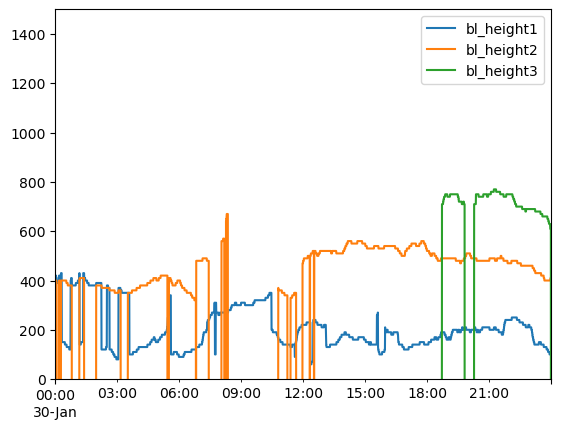

In [6]:
# Plot of all three heights on same axis, with legend, -999 replaced with NaN, and ylim only up to 1500m AGL.
fig,ax = plt.subplots(1)
df_pbl.plot(ax=ax, ylim=(0, 1500), legend=True)


✅ Loaded dataset from /Users/johnlawson/data/misc_jrl/L3_DEFAULT_06610_202501290000_1_360_1_3120_10_30_4000_3_0_1_500_1000_4000_60.nc

📌 Dataset Dimensions:
  - timeDim: 5400
  - nameDim: 1
  - date_stampDim: 1
  - message_typeDim: 1
  - periodDim: 1
  - Mean_Layer_HeightDim: 1
  - Mean_Layer_QualityIndexDim: 1
  - Mean_Layer_Calculation_TimeDim: 1
  - cloud_statusDim: 1
  - cloud_dataDim: 3
  - bl_height_lengthDim: 1
  - bl_indexDim: 3
  - bl_heightDim: 3
  - Bs_prof_lengthDim: 1
  - range: 450
  - Ng_prof_lengthDim: 1
  - Ec_prof_lengthDim: 1
  - Ec_prof_rangeDim: 1
  - Ec_prof_opacityDim: 1
  - vrb_height_averagingDim: 1
  - vrb_time_averagingDim: 1
  - Height_averaging_paramDim: 1
  - Time_averaging_periodDim: 1
  - algorithm_sensitivityDim: 1
  - boundary_layer_minDim: 1
  - boundary_layer_maxDim: 1
  - number_of_boundary_layersDim: 1
  - Location_latitudeDim: 1
  - Location_longitudeDim: 1
  - Location_altitudeDim: 1
  - location_utc_offsetDim: 1
  - Alogrithm_MethodDim: 1
  - pa

<Axes: >

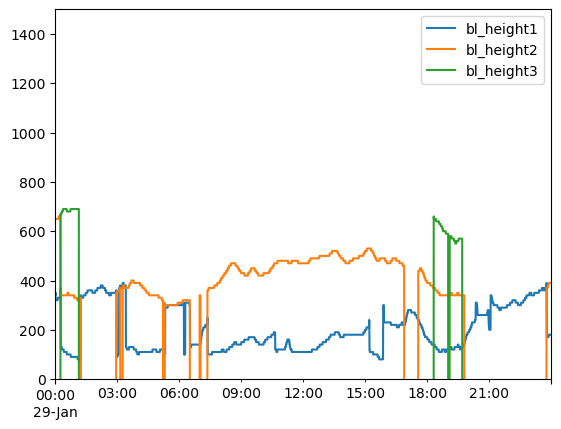

In [7]:
# Try the previous day
explorer = NetCDFExplorer(fpath_to_nc1)  # Load dataset
time_index = explorer.get_time_index()

df_pbl = pd.DataFrame(
    explorer.ds['bl_height'].values,
    columns=column_names,
).set_index(time_index)
fig,ax = plt.subplots(1)
df_pbl.plot(ax=ax, ylim=(0, 1500), legend=True)

# Other netcdf file

In [8]:
explorer = NetCDFExplorer(fpath_to_nc2)  # Load dataset


✅ Loaded dataset from /Users/johnlawson/data/misc_jrl/L1_06610_202501290000.nc

📌 Dataset Dimensions:
  - timeDim: 2400
  - nameDim: 1
  - range: 1540
  - message_typeDim: 1
  - versionDim: 1
  - date_stampDim: 1
  - periodDim: 1
  - tilt_angleDim: 1
  - cloud_statusDim: 1
  - cloud_dataDim: 3
  - status_bitsDim: 1
  - profile_scaleDim: 1
  - profile_resolutionDim: 1
  - profile_lengthDim: 1

📌 Data Variables:
  - time (shape: (2400,), dtype: int32)
  - name (shape: (2400, 1), dtype: <U12)
  - message_type (shape: (2400, 1), dtype: int32)
  - version (shape: (2400, 1), dtype: int32)
  - date_stamp (shape: (2400, 1), dtype: <U19)
  - period (shape: (2400, 1), dtype: int32)
  - tilt_angle (shape: (2400, 1), dtype: int32)
  - cloud_status (shape: (2400, 1), dtype: int32)
  - cloud_data (shape: (2400, 3), dtype: float32)
  - status_bits (shape: (2400, 1), dtype: <U12)
  - profile_scale (shape: (2400, 1), dtype: int32)
  - profile_resolution (shape: (2400, 1), dtype: int32)
  - profile_leng